# Model Creation

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to your dataset
dataset_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)"

# Define image dimensions and other parameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 10

# Create an ImageDataGenerator to preprocess the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # assuming multiple classes (diseases)
    subset='training'
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    
    class_mode='categorical',
    subset='validation'
)

# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model  
model.save('prawn_disease_model.h5')


Found 1228 images belonging to 4 classes.
Found 307 images belonging to 4 classes.
Epoch 1/10
39/39 [==============================] - 30s 754ms/step - loss: 0.6263 - accuracy: 0.7777 - val_loss: 0.7053 - val_accuracy: 0.6482
Epoch 2/10
39/39 [==============================] - 20s 524ms/step - loss: 0.3337 - accuracy: 0.8893 - val_loss: 0.5859 - val_accuracy: 0.7329
Epoch 3/10
39/39 [==============================] - 20s 501ms/step - loss: 0.2705 - accuracy: 0.9080 - val_loss: 0.6407 - val_accuracy: 0.7231
Epoch 4/10
39/39 [==============================] - 20s 505ms/step - loss: 0.1764 - accuracy: 0.9406 - val_loss: 0.8881 - val_accuracy: 0.6873
Epoch 5/10
39/39 [==============================] - 18s 469ms/step - loss: 0.1690 - accuracy: 0.9503 - val_loss: 0.7341 - val_accuracy: 0.7752
Epoch 6/10
39/39 [==============================] - 20s 517ms/step - loss: 0.1159 - accuracy: 0.9642 - val_loss: 0.7706 - val_accuracy: 0.7492
Epoch 7/10
39/39 [==============================] - 19s 495

# Prediction

In [9]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('prawn_disease_model.h5')

# Define the path to the image you want to predict
image_path = r"C:\Users\devin\OneDrive\Desktop\quality images\black gill\rotated_pic (850).png_rotated_3.png"
# Load and preprocess the input image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Map class index to class label
class_mapping = {0: 'Black Gill', 1: 'healthy', 2: 'Vibriosis', 3: 'white spot'}
predicted_label = class_mapping.get(predicted_class, 'Unknown')

print(f"The predicted class is: {predicted_label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
The predicted class is: Black Gill


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('prawn_disease_model.h5')

# Define the path to the image you want to predict
image_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\healthy\pic (449).png"

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Map class index to class label
class_mapping = {0: 'Black Gill', 1: 'healthy', 2: 'Vibriosis', 3: 'white spot'}
predicted_label = class_mapping.get(predicted_class, 'Unknown')

# Print the predicted class and its associated probability
print(f"The predicted class is: {predicted_label}")
print("Probabilities:")
for i, prob in enumerate(predictions[0]):
    class_label = class_mapping.get(i, 'Unknown')
    print(f"{class_label}: {prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
The predicted class is: healthy
Probabilities:
Black Gill: 4.5152392935676744e-10
healthy: 0.9999196529388428
Vibriosis: 8.033660560613498e-05
white spot: 5.621380097520223e-12


In [4]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

# # Load the trained model
# model = load_model('prawn_disease_model.h5')

# # Define the path to the image you want to predict
# image_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\healthy\pic (449).png"

# # Load the image
# img = cv2.imread(image_path)

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply thresholding to create a mask for the foreground
# _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# # Apply the mask to the original image
# result = cv2.bitwise_and(img, img, mask=mask)

# # Convert the image to RGB (if it's not already in RGB)
# result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# # Resize the image and convert to float32
# img = cv2.resize(result, (150, 150)).astype(np.float32)

# # Normalize the image
# img /= 255.0

# # Expand dimensions to create a batch dimension
# img_array = np.expand_dims(img, axis=0)

# # Make predictions
# predictions = model.predict(img_array)

# # Get the class with the highest probability
# predicted_class = np.argmax(predictions)

# # Map class index to class label
# class_mapping = {0: 'Black Gill', 1: 'healthy', 2: 'Vibriosis', 3: 'white spot'}
# predicted_label = class_mapping.get(predicted_class, 'Unknown')

# # Print the predicted class and its associated probability
# print(f"The predicted class is: {predicted_label}")
# print("Probabilities:")
# for i, prob in enumerate(predictions[0]):
#     class_label = class_mapping.get(i, 'Unknown')
#     print(f"{class_label}: {prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
The predicted class is: Vibriosis
Probabilities:
Black Gill: 0.00047232143697328866
healthy: 0.44544199109077454
Vibriosis: 0.5538870096206665
white spot: 0.00019869866082444787


In [8]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('prawn_disease_model.h5')

# Define the path to the image you want to predict
image_path = r"C:\Users\devin\OneDrive\Desktop\quality images\black gill\rotated_pic (850).png_rotated_3.png"

# Load the image with an alpha channel if it exists
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Check if the image contains an alpha channel and if all values are not equal to 255
if img.shape[-1] == 4 and not np.all(img[:, :, 3] == 255):
    # Convert the image to RGBA format
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

    # Extract the alpha channel
    alpha = img[:, :, 3]

    # Create a mask for the foreground (where alpha is not fully opaque)
    mask = alpha != 255

    # Convert the mask to uint8 data type
    mask = mask.astype(np.uint8) * 255

    # Apply the mask to the original image to remove the background
    result = cv2.bitwise_and(img, img, mask=mask)

    # Convert the image back to RGBA format
    result = cv2.cvtColor(result, cv2.COLOR_RGBA2RGB)
else:
    # If there is no alpha channel or all values are 255, leave the image as is
    result = img

# Resize the image and convert to float32
result = cv2.resize(result, (150, 150)).astype(np.float32)

# Normalize the image
result /= 255.0

# Expand dimensions to create a batch dimension
img_array = np.expand_dims(result, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Map class index to class label
class_mapping = {0: 'Black Gill', 1: 'healthy', 2: 'Vibriosis', 3: 'white spot'}
predicted_label = class_mapping.get(predicted_class, 'Unknown')

# Print the predicted class and its associated probability
print(f"The predicted class is: {predicted_label}")
print("Probabilities:")
for i, prob in enumerate(predictions[0]):
    class_label = class_mapping.get(i, 'Unknown')
    print(f"{class_label}: {prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
The predicted class is: healthy
Probabilities:
Black Gill: 0.0006720352685078979
healthy: 0.9989437460899353
Vibriosis: 1.2027235243294854e-05
white spot: 0.00037226357380859554


# Probability

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('prawn_disease_model.h5')

# Define the path to the image you want to predict
image_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)\healthy\pic (449).png"

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Map class index to class label
class_mapping = {0: 'Black Gill', 1: 'healthy', 2: 'Vibriosis', 3: 'white spot'}
predicted_label = class_mapping.get(predicted_class, 'Unknown')

# Print the predicted class and its associated probability
print(f"The predicted class is: {predicted_label}")
print("Probabilities:")
for i, prob in enumerate(predictions[0]):
    class_label = class_mapping.get(i, 'Unknown')
    print(f"{class_label}: {prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The predicted class is: healthy
Probabilities:
Black Gill: 4.5152392935676744e-10
healthy: 0.9999196529388428
Vibriosis: 8.033660560613498e-05
white spot: 5.621380097520223e-12


In [2]:
# # Model with background remover

# In[12]:


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2  # OpenCV library

# Load the trained model
model = load_model('prawn_disease_model.h5')

# Define the path to the image you want to predict
image_path = r"C:\Users\devin\Downloads\WhatsApp Image 2024-04-15 at 8.21.02 PM.jpeg"

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img)

# Convert to grayscale
gray = cv2.cvtColor(img_array.astype(np.uint8), cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to create a mask
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Use the mask to keep only the prawn
img_array[thresh == 0] = 255

# Expand dimensions and normalize
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Map class index to class label
class_mapping = {0: 'healthy', 1: 'black gill', 2: 'vibriosis', 3: 'white spot'}
predicted_label = class_mapping.get(predicted_class, 'Unknown')

print(f"The predicted class is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
The predicted class is: black gill


# # combination of accuracy and confusion matrix

Found 1228 images belonging to 4 classes.
Found 307 images belonging to 4 classes.
Epoch 1/10
39/39 [==============================] - 21s 508ms/step - loss: 0.6419 - accuracy: 0.7459 - val_loss: 0.6301 - val_accuracy: 0.6938
Epoch 2/10
39/39 [==============================] - 19s 479ms/step - loss: 0.3579 - accuracy: 0.8803 - val_loss: 0.6412 - val_accuracy: 0.7655
Epoch 3/10
39/39 [==============================] - 19s 486ms/step - loss: 0.2465 - accuracy: 0.9218 - val_loss: 0.5557 - val_accuracy: 0.7915
Epoch 4/10
39/39 [==============================] - 19s 475ms/step - loss: 0.1693 - accuracy: 0.9511 - val_loss: 0.6453 - val_accuracy: 0.7720
Epoch 5/10
39/39 [==============================] - 18s 465ms/step - loss: 0.1453 - accuracy: 0.9552 - val_loss: 1.3098 - val_accuracy: 0.6710
Epoch 6/10
39/39 [==============================] - 18s 454ms/step - loss: 0.1453 - accuracy: 0.9536 - val_loss: 0.6479 - val_accuracy: 0.7850
Epoch 7/10
39/39 [==============================] - 18s 459

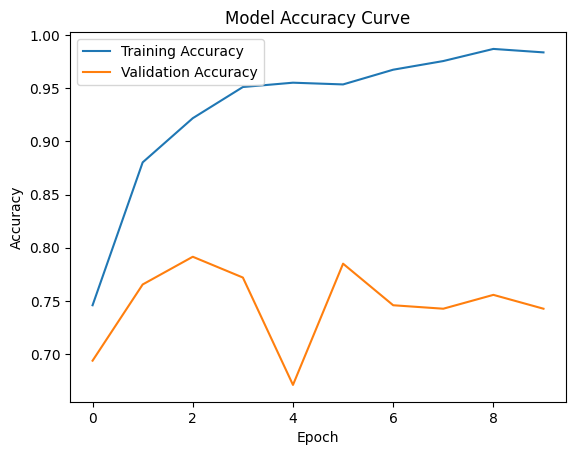

10/10 [==============================] - 1s 113ms/step - loss: 1.1497 - accuracy: 0.7427
Validation Loss: 1.1496660709381104, Validation Accuracy: 0.742671012878418
10/10 [==============================] - 1s 108ms/step
Classification Report:
              precision    recall  f1-score   support

  black gill       0.00      0.00      0.00         4
     healthy       0.58      0.47      0.52       187
    vibrosis       0.17      0.28      0.21        60
  white spot       0.23      0.21      0.22        56

    accuracy                           0.38       307
   macro avg       0.24      0.24      0.24       307
weighted avg       0.43      0.38      0.40       307

Confusion Matrix:
[[ 0  4  0  0]
 [ 2 87 67 31]
 [ 0 33 17 10]
 [ 2 25 17 12]]


In [7]:


# In[17]:


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Set the path to your dataset
dataset_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)"

# Define image dimensions and other parameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 10

# Create an ImageDataGenerator to preprocess the images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # assuming multiple classes (diseases)
    subset='training'
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # output layer



# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and obtain training history
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model
model.save('prawn_disease_model.h5')

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_results[0]}, Validation Accuracy: {validation_results[1]}")

# Generate predictions for the validation set
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate and print classification report and confusion matrix
class_labels = list(validation_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_labels))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_labels)
print(conf_matrix)

# master code combination of model accuracy curve,ROC,confusion matrix,Heat maps

Found 1228 images belonging to 4 classes.
Found 307 images belonging to 4 classes.
Epoch 1/20
39/39 [==============================] - 20s 483ms/step - loss: 0.8827 - accuracy: 0.6384 - val_loss: 0.7416 - val_accuracy: 0.7003
Epoch 2/20
39/39 [==============================] - 18s 464ms/step - loss: 0.6784 - accuracy: 0.7296 - val_loss: 0.7397 - val_accuracy: 0.7492
Epoch 3/20
39/39 [==============================] - 19s 496ms/step - loss: 0.6282 - accuracy: 0.7394 - val_loss: 0.7862 - val_accuracy: 0.6938
Epoch 4/20
39/39 [==============================] - 19s 473ms/step - loss: 0.6038 - accuracy: 0.7492 - val_loss: 0.6779 - val_accuracy: 0.7459
Epoch 5/20
39/39 [==============================] - 19s 477ms/step - loss: 0.5461 - accuracy: 0.7622 - val_loss: 0.6564 - val_accuracy: 0.7622
Epoch 6/20
39/39 [==============================] - 20s 503ms/step - loss: 0.4953 - accuracy: 0.7899 - val_loss: 0.5802 - val_accuracy: 0.7818
Epoch 7/20
39/39 [==============================] - 18s 463

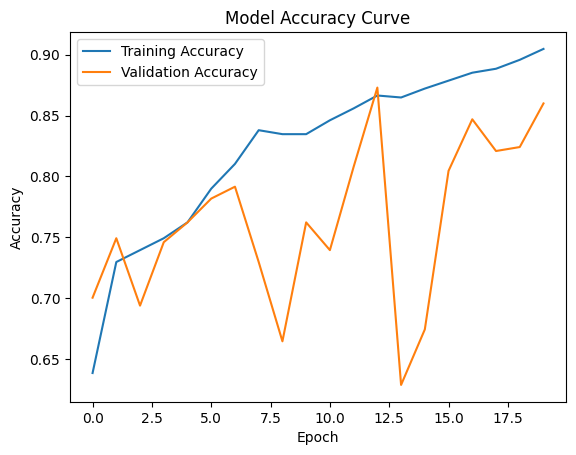

10/10 [==============================] - 2s 178ms/step - loss: 0.6255 - accuracy: 0.8632
Validation Loss: 0.6255452632904053, Validation Accuracy: 0.8631922006607056
10/10 [==============================] - 2s 179ms/step
Classification Report:
              precision    recall  f1-score   support

  black gill       0.00      0.00      0.00         4
     healthy       0.56      0.57      0.56       187
    vibrosis       0.15      0.12      0.13        60
  white spot       0.15      0.20      0.17        56

    accuracy                           0.40       307
   macro avg       0.22      0.22      0.22       307
weighted avg       0.40      0.40      0.40       307

Confusion Matrix:
[[  0   3   0   1]
 [  0 106  32  49]
 [  0  43   7  10]
 [  0  37   8  11]]


C:\Users\devin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

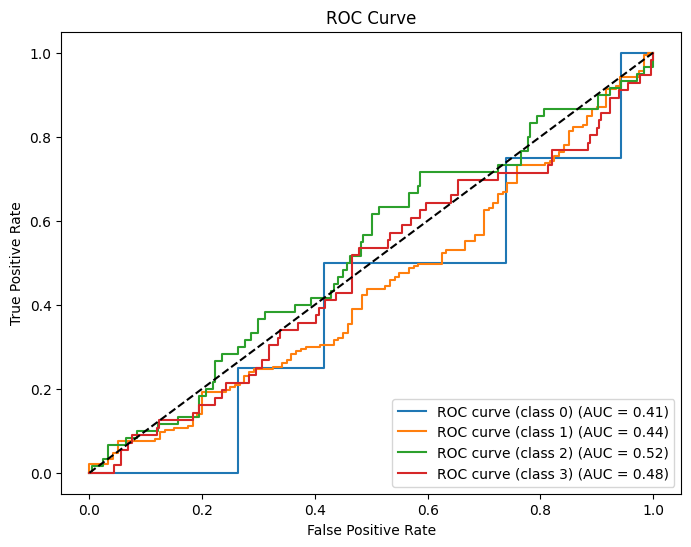

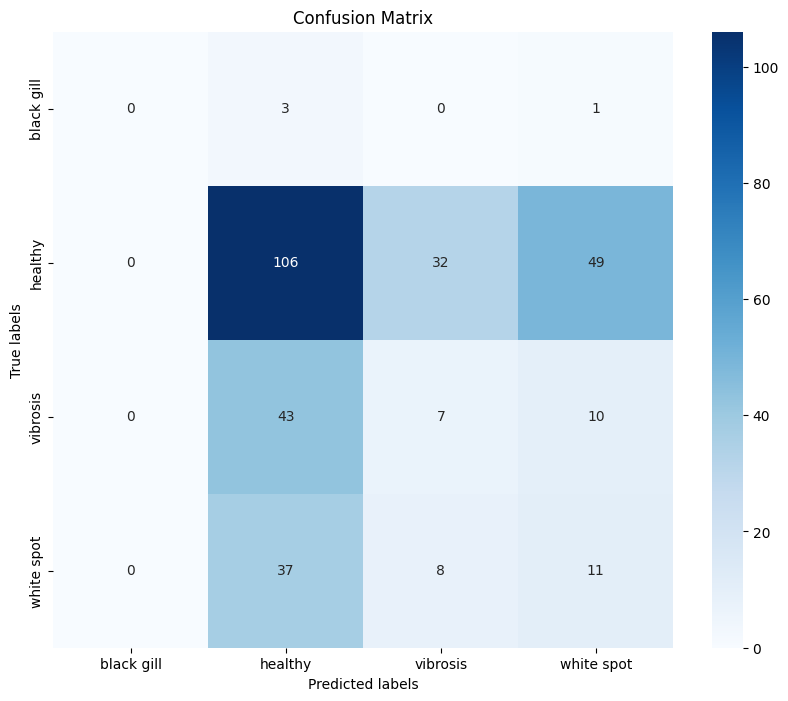

In [8]:


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Set the path to your dataset
dataset_path = r"C:\Users\devin\OneDrive\Desktop\diseases (2)"

# Define image dimensions and other parameters
img_width, img_height = 150, 150
batch_size = 32
epochs = 20  # Increase the number of epochs for better training

# Create an ImageDataGenerator to preprocess the images
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # assuming multiple classes (diseases)
    subset='training'
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build a more complex CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and obtain training history
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model
model.save('prawn_disease_model_v2.h5')

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
validation_results = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_results[0]}, Validation Accuracy: {validation_results[1]}")

# Generate predictions for the validation set
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate and print classification report and confusion matrix
class_labels = list(validation_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_labels))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_labels)
print(conf_matrix)

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
